<a href="https://colab.research.google.com/github/ijinshes2ly/LogisticRegression/blob/main/GM_D24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# 데이터 생성
data = {
    "고객ID": ["A001", "A002", "A003"],
    "마지막 주문일": pd.to_datetime(["2024-02-20", "2024-01-10", "2024-02-15"]),
    "첫 주문일": pd.to_datetime(["2023-01-15", "2023-05-02", "2023-06-10"]),
    "총 주문 횟수": [10, 5, 8],
    "최근 30일 주문 횟수": [2, 1, 4],
    "고객 서비스 문의 횟수": [1, 3, 0],
}

df = pd.DataFrame(data)

# 평균 주문 간격 계산
df["평균 주문 간격"] = (df["마지막 주문일"] - df["첫 주문일"]).dt.days / df["총 주문 횟수"]  #날짜 차이를 일(days) 단위로 변환

# 고객 이탈 가능성 점수 계산 (예시: 서비스 문의가 많고 주문 간격이 길면 이탈 가능성이 높음)
df["이탈 가능성 점수"] = df["평균 주문 간격"] * 0.5 + df["고객 서비스 문의 횟수"] * 2

# 결과 출력
display(df)


,고객ID,마지막 주문일,첫 주문일,총 주문 횟수,최근 30일 주문 횟수,고객 서비스 문의 횟수,평균 주문 간격,이탈 가능성 점수
0,A001,2024-02-20,2023-01-15,10,2,1,40.10,22.050
1,A002,2024-01-10,2023-05-02,5,1,3,50.60,31.300
2,A003,2024-02-15,2023-06-10,8,4,0,31.25,15.625


In [2]:
### **2. 광고 효율 최적화를 위한 특징 엔지니어링**
# 데이터 생성
data = {
    "유저ID": ["U001", "U002", "U003"],
    "광고 클릭 수": [10, 5, 7],
    "광고 노출 수": [200, 150, 100],
    "구매 전환까지 걸린 시간(초)": [120, 300, 90],
    "유입 채널": ["Facebook", "Google Ads", "Instagram"],
    "구매 금액": [25000, 18000, 30000],
}

df = pd.DataFrame(data)

# CTR (Click Through Rate) 계산
df["CTR"] = df["광고 클릭 수"] / df["광고 노출 수"]

# 유입 채널별 평균 구매 금액 계산
channel_avg_purchase = df.groupby("유입 채널")["구매 금액"].mean().to_dict() #to_dict()는 Pandas DataFrame이나 Series를 Python 딕셔너리로 변환하는 함수
df["유입 채널별 평균 구매 금액"] = df["유입 채널"].map(channel_avg_purchase)

# 결과 출력
display(df)


,유저ID,광고 클릭 수,광고 노출 수,구매 전환까지 걸린 시간(초),유입 채널,구매 금액,CTR,유입 채널별 평균 구매 금액
0,U001,10,200,120,Facebook,25000,0.050000,25000.0
1,U002,5,150,300,Google Ads,18000,0.033333,18000.0
2,U003,7,100,90,Instagram,30000,0.070000,30000.0


In [3]:
#3. 상품 추천 최적화를 위한 특징 엔지니어링
# 데이터 생성
data = {
    "고객ID": ["C001", "C002", "C003"],
    "최근 3개월 구매 카테고리": [["전자기기", "패션", "스포츠"], ["가구", "생활용품"], ["패션", "뷰티", "전자기기"]],
    "최근 본 상품": ["스마트폰", "소파", "헤드폰"],
    "최근 구매 상품": ["태블릿", "책상", "스마트워치"],
    "구매 주기(일)": [20, 35, 15],
}

df = pd.DataFrame(data)

# 카테고리 다양성 계산 (고유한 카테고리 개수)
df["카테고리 다양성"] = df["최근 3개월 구매 카테고리"].apply(lambda x: len(set(x)))

# 최근 본 상품과 최근 구매 상품이 같은 카테고리에 속하는지 확인
df["유사 구매 여부"] = df.apply(lambda row: row["최근 본 상품"] in row["최근 3개월 구매 카테고리"], axis=1)

# 추천 최적화 모델을 위한 특징 데이터 출력
display(df)


,고객ID,최근 3개월 구매 카테고리,최근 본 상품,최근 구매 상품,구매 주기(일),카테고리 다양성,유사 구매 여부
0,C001,"[전자기기, 패션, 스포츠]",스마트폰,태블릿,20,3,False
1,C002,"[가구, 생활용품]",소파,책상,35,2,False
2,C003,"[패션, 뷰티, 전자기기]",헤드폰,스마트워치,15,3,False


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.1 MB/s eta 0:00:00
모델 절편 (Intercept): 53.866072749149964
모델 기울기 (Slope): 0.04806722001693924
결정계수 (R²): 0.9562510975487811


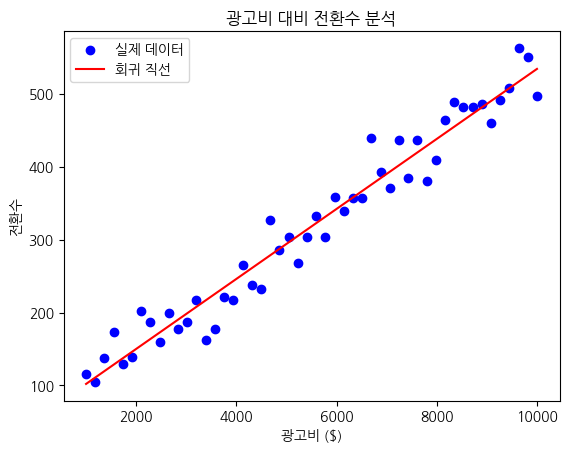

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
!pip install koreanize-matplotlib
import koreanize_matplotlib

# 1. 가상의 데이터 생성
np.random.seed(42)  # 결과 재현을 위한 시드 설정
# 광고비 데이터: 1,000 ~ 10,000 달러 사이의 50개 포인트
ad_spend = np.linspace(1000, 10000, 50)
# 실제 전환수: 실제로는 광고비가 증가할수록 전환수가 증가한다고 가정
# 실제 모형: conversions = intercept + slope * ad_spend + noise
true_intercept = 50      # 광고비 0일 때 기본 전환수
true_slope = 0.05        # 광고비 1달러 증가당 전환수 증가량
noise = np.random.normal(0, 30, ad_spend.shape[0])  # 랜덤 노이즈 추가
conversions = true_intercept + true_slope * ad_spend + noise

# 데이터프레임 생성
df = pd.DataFrame({'ad_spend': ad_spend, 'conversions': conversions})

# 2. 회귀분석을 위한 데이터 준비
X = df[['ad_spend']]  # 독립 변수 (광고비)
y = df['conversions']  # 종속 변수 (전환수)

# 3. 단순 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 4. 모델 파라미터 출력
print("모델 절편 (Intercept):", model.intercept_)
print("모델 기울기 (Slope):", model.coef_[0])

# 5. 예측값 계산 및 결정계수 평가
y_pred = model.predict(X)
print("결정계수 (R²):", r2_score(y, y_pred))

# 6. 결과 시각화
plt.scatter(df['ad_spend'], df['conversions'], color='blue', label='실제 데이터')
plt.plot(df['ad_spend'], y_pred, color='red', label='회귀 직선')
plt.title('광고비 대비 전환수 분석')
plt.xlabel('광고비 ($)')
plt.ylabel('전환수')
plt.legend()
plt.show()

광고비 100$ 증가 시 전환수 4 증가.
R^2값이 0.9이상이므로 모델의 설명력이 좋음.

## 회귀분석에 대한 그로스 마케팅 시나리오

**배경:** 한 온라인 쇼핑몰의 마케팅 팀은 광고비 지출이 고객 전환(예: 구매, 회원 가입, 앱 다운로드 등)에 미치는 영향을 분석하고자 합니다.

- **목표:** 광고비를 최적화하여 전환수를 극대화하고, 효율적인 마케팅 전략을 수립합니다.
- **방법:**
    1. 과거 일정 기간 동안 광고비와 전환수 데이터를 수집합니다.
    2. 단순 회귀 분석을 통해 광고비(독립 변수)와 전환수(종속 변수) 간의 선형 관계를 모델링합니다.
    3. 모델을 통해 광고비가 1단위 증가할 때 예상되는 전환수의 변화(기울기)와, 광고비 0일 때의 예상 전환수(절편)를 파악합니다.
    4. 결정계수(R²)를 이용해 모델의 설명력을 평가하고, 마케팅 전략의 효과를 검증합니다.

모델 절편 (Intercept): 52.00000000000003
모델 기울기 (Slope): 0.049999999999999996
결정계수 (R²): 0.9982032341784788


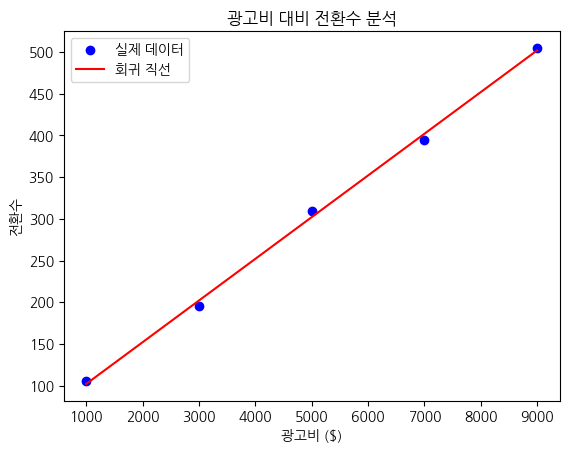

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
data = {
    "광고비 (달러)": [1000, 3000, 5000, 7000, 9000],
    "전환수": [105, 195, 310, 395, 505]
}
df = pd.DataFrame(data)


# 2. 회귀분석을 위한 데이터 준비
X = df[['광고비 (달러)']]  # 독립 변수 (광고비)
y = df['전환수']  # 종속 변수 (전환수)

# 3. 단순 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 4. 모델 파라미터 출력
print("모델 절편 (Intercept):", model.intercept_)
print("모델 기울기 (Slope):", model.coef_[0])

# 5. 예측값 계산 및 결정계수 평가
y_pred = model.predict(X)
print("결정계수 (R²):", r2_score(y, y_pred))

# 6. 결과 시각화
plt.scatter(df['광고비 (달러)'], df['전환수'], color='blue', label='실제 데이터')
plt.plot(df['광고비 (달러)'], y_pred, color='red', label='회귀 직선')
plt.title('광고비 대비 전환수 분석')
plt.xlabel('광고비 ($)')
plt.ylabel('전환수')
plt.legend()
plt.show()

#1. 절편과 기울기를 추정하고, 회귀식을 도출
모델 절편 (Intercept): 52.00000000000003
모델 기울기 (Slope): 0.049999999999999996
y= 52 + 0.05 *x
#2. 광고비가 6,000달러일 때 예상되는 전환수를 예측
= 6,000*0.05 + 52 = 352
광고비 6000달러 일때 전환수 352증가 예측 가능함.
#3. 결정계수가 의미하는 바와, 마케팅 전략 수립 시 어떻게 활용할 수 있는지 서술
-결정계수는 모델의 성능을 파악할 수 있는 지표. 값이 1이면 추정값과 실제값의 차이가 0임을 의미함. 이는 모델이 데이터를 잘 설명하고 있음을 보여줌.
-위 모델의 결정계수는 결정계수 (R²): 0.9982032341784788.
광고비와 전환수의 관계를 안정적으로 설명할 수 있음을 확인함. 광고비가 증가할 때 전환수도 증가하는 특징을 보임.
-목표 전환수를 달성하기위해 필요한 광고비를 예측할 수 있음.
-예산 배분 시 광고비 증액이 전환수 향상에 효과적일 가능성이 높으므로, ROI(투자 대비 수익)를 고려하여 추가 예산 배분을 검토할 필요가 있음

회귀식: 전환수 = 96.33 + 0.02776 * 광고비
결정계수 (R²): 0.9988


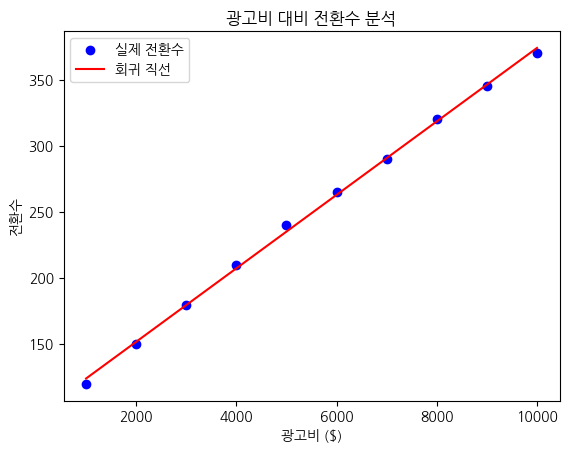

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. 가상의 데이터 준비
data = {
    'ad_spend': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    'conversions': [120, 150, 180, 210, 240, 265, 290, 320, 345, 370]
}
df = pd.DataFrame(data)

# 2. 독립 변수(X)와 종속 변수(y) 설정
X = df[['ad_spend']]
y = df['conversions']

# 3. 단순 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 4. 모델 파라미터 및 결정계수(R²) 출력
intercept = model.intercept_
slope = model.coef_[0]
r2 = r2_score(y, model.predict(X))

print("회귀식: 전환수 = {:.2f} + {:.5f} * 광고비".format(intercept, slope))
print("결정계수 (R²): {:.4f}".format(r2))

# 5. 예측 및 시각화
df['predicted_conversions'] = model.predict(X)

plt.scatter(df['ad_spend'], df['conversions'], color='blue', label='실제 전환수')
plt.plot(df['ad_spend'], df['predicted_conversions'], color='red', label='회귀 직선')
plt.title('광고비 대비 전환수 분석')
plt.xlabel('광고비 ($)')
plt.ylabel('전환수')
plt.legend()
plt.show()

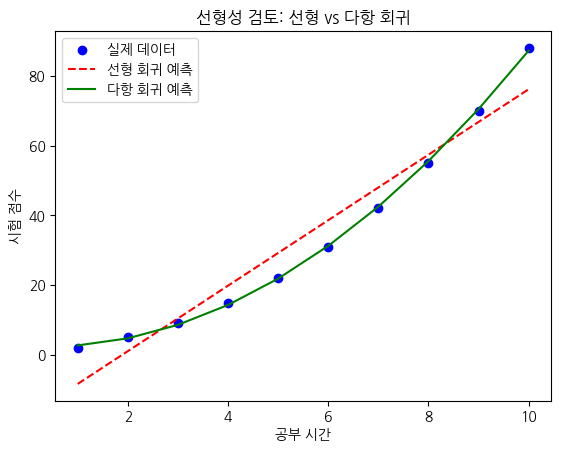

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성 (선형 관계가 아님)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 5, 9, 15, 22, 31, 42, 55, 70, 88])  # 비선형 관계

# 선형 회귀 모델
linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred = linear_reg.predict(X)

# 다항 회귀 적용 (2차 변환)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_poly_pred = poly_reg.predict(X_poly)

# 시각화
plt.scatter(X, y, color="blue", label="실제 데이터")
plt.plot(X, y_pred, color="red", linestyle="dashed", label="선형 회귀 예측")
plt.plot(X, y_poly_pred, color="green", label="다항 회귀 예측")
plt.xlabel("공부 시간")
plt.ylabel("시험 점수")
plt.legend()
plt.title("선형성 검토: 선형 vs 다항 회귀")
plt.show()


In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 예제 데이터 생성
data = {
    "house_size": [50, 60, 70, 80, 90, 100, 110, 120, 130, 140],  # 집 크기
    "num_rooms": [3, 3, 4, 4, 5, 5, 6, 6, 7, 7],  # 방 개수 (집 크기와 강한 상관)
    "price": [200, 250, 300, 350, 400, 450, 500, 550, 600, 650]  # 집값
}

df = pd.DataFrame(data)

# 다중 공선성 검토
X = df[["house_size", "num_rooms"]]
X = sm.add_constant(X)  # 상수 추가
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


      Feature   VIF
0       const  14.5
1  house_size  33.0
2   num_rooms  33.0


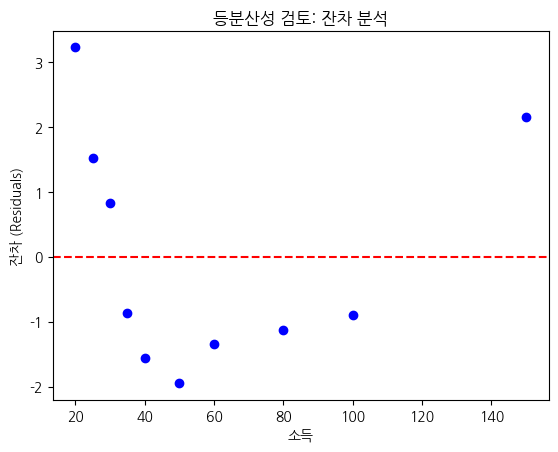

In [10]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 데이터 생성 (소득에 따라 소비 변화가 일정하지 않음)
income = np.array([20, 25, 30, 35, 40, 50, 60, 80, 100, 150]).reshape(-1, 1)
spending = np.array([5, 7, 10, 12, 15, 22, 30, 45, 60, 100])  # 고소득층에서 변화가 큼

# 회귀 분석
model = LinearRegression()
model.fit(income, spending)
predictions = model.predict(income)

# 잔차 분석
residuals = spending - predictions

# 시각화
plt.scatter(income, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="dashed")
plt.xlabel("소득")
plt.ylabel("잔차 (Residuals)")
plt.title("등분산성 검토: 잔차 분석")
plt.show()


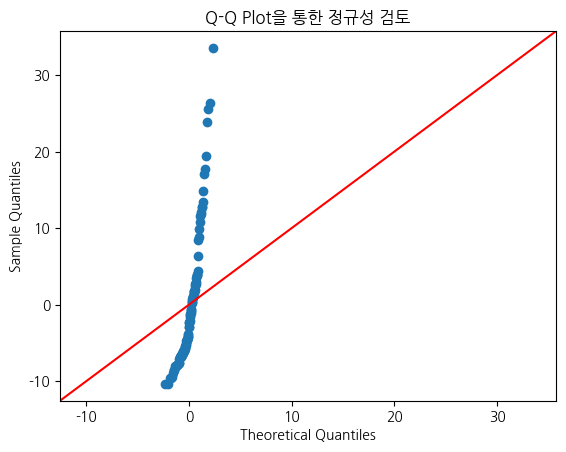

Shapiro-Wilk Test p-value: 1.2412573586122268e-08


In [11]:
from scipy import stats
import statsmodels.api as sm

# 데이터 생성 (정규성을 따르지 않는 예제)
np.random.seed(42)
X = np.random.normal(50, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.exponential(10, 100)  # 지수 분포 노이즈 추가

# 회귀 모델
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# 잔차 계산
residuals = y - predictions

# Q-Q Plot (잔차의 정규성 검토)
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot을 통한 정규성 검토")
plt.show()

# Shapiro-Wilk Test (정규성 검정)
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")

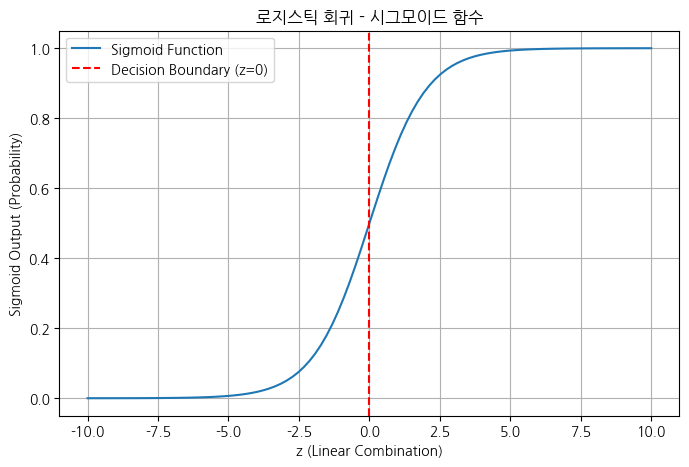

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# x 값 범위 설정
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# 그래프 출력
plt.figure(figsize=(8, 5))
plt.plot(z, sigmoid_values, label="Sigmoid Function")
plt.axvline(x=0, color='r', linestyle='dashed', label="Decision Boundary (z=0)")
plt.xlabel("z (Linear Combination)")
plt.ylabel("Sigmoid Output (Probability)")
plt.title("로지스틱 회귀 - 시그모이드 함수")
plt.legend()
plt.grid()
plt.show()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 생성
np.random.seed(42)
n_samples = 200
watch_time = np.random.uniform(0, 10, n_samples)  # 광고 시청 시간
visit_count = np.random.randint(1, 50, n_samples)  # 방문 횟수
clicked = (watch_time * 0.3 + visit_count * 0.1 + np.random.normal(0, 1, n_samples) > 3.5).astype(int)  # 클릭 여부 (0 or 1)

# 데이터프레임 생성
df = pd.DataFrame({"Watch Time": watch_time, "Visit Count": visit_count, "Clicked": clicked})

# 학습/테스트 데이터 분리
X = df[["Watch Time", "Visit Count"]]
y = df["Clicked"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"정확도(Accuracy): {accuracy:.2f}")
print("혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("분류 보고서:\n", classification_report(y_test, y_pred))


정확도(Accuracy): 0.85
혼동 행렬:
 [[12  4]
 [ 2 22]]
분류 보고서:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.85      0.92      0.88        24

    accuracy                           0.85        40
   macro avg       0.85      0.83      0.84        40
weighted avg       0.85      0.85      0.85        40



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 데이터 로드
df = pd.read_csv("customer_churn.csv")

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(columns=["Churn"])
y = df["Churn"]

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("고객 이탈 예측 (Customer Churn Prediction)")
print(f"정확도: {accuracy:.2f}")
print("분류 보고서:\n", classification_report(y_test, y_pred))


고객 이탈 예측 (Customer Churn Prediction)
정확도: 0.96
분류 보고서:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        93
           1       1.00      0.43      0.60         7

    accuracy                           0.96       100
   macro avg       0.98      0.71      0.79       100
weighted avg       0.96      0.96      0.95       100



In [31]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 데이터 로드
df = pd.read_csv("customer_churn.csv")

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(columns=["Churn"])
y = df["Churn"]

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("고객 이탈 예측 (Customer Churn Prediction")
print(f"정확도: {accuracy:.2f}")
print("분류 보고서:\n", classification_report(y_test, y_pred))

# 새로운 데이터 예측
new_data = pd.DataFrame([{
    "Avg Purchase Amount ($)": 10,  # 평균 구매 금액 ($)
    "Visits Per Month": 2,  # 월 방문 횟수
    "Used Discount": 0,  # 할인 사용 여부 (0 = No, 1 = Yes)
    "Customer Support Calls": 2,  # 고객 지원 콜 횟수
}])

# 누락된 컬럼 확인 후 예측 수행
missing_cols = set(X.columns) - set(new_data.columns)
if missing_cols:
    print(f"누락된 컬럼: {missing_cols}")
else:
    # 컬럼 순서 일치
    new_data = new_data[X.columns]

    # 예측 수행
    predicted_churn = model.predict(new_data)
    print(f"예측된 고객 이탈 여부(Churn): {predicted_churn[0]}")

고객 이탈 예측 (Customer Churn Prediction
정확도: 0.96
분류 보고서:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        93
           1       1.00      0.43      0.60         7

    accuracy                           0.96       100
   macro avg       0.98      0.71      0.79       100
weighted avg       0.96      0.96      0.95       100

예측된 고객 이탈 여부(Churn): 0


In [25]:
# 데이터 로드
df = pd.read_csv("ad_clicks.csv")

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(columns=["Clicked Ad"])
y = df["Clicked Ad"]

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("광고 클릭 예측 (Ad Click Prediction)")
print(f"정확도: {accuracy:.2f}")
print("분류 보고서:\n", classification_report(y_test, y_pred))


광고 클릭 예측 (Ad Click Prediction)
정확도: 0.82
분류 보고서:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.83      0.86      0.85        58

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



In [26]:

# 데이터 로드
df = pd.read_csv("email_campaigns.csv")

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(columns=["Opened Email"])
y = df["Opened Email"]

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("#이메일 캠페인 반응 예측 (Email Campaign Response Prediction")
print(f"정확도: {accuracy:.2f}")
print("분류 보고서:\n", classification_report(y_test, y_pred))


#이메일 캠페인 반응 예측 (Email Campaign Response Prediction
정확도: 0.89
분류 보고서:
               precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.88      0.99      0.93        73

    accuracy                           0.89       100
   macro avg       0.91      0.81      0.84       100
weighted avg       0.90      0.89      0.88       100



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 데이터 로드
df = pd.read_csv("product_subscription.csv")

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(columns=["Subscribed"])
y = df["Subscribed"]

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("제품 구독 예측 (Product Subscription Prediction)")
print(f"정확도: {accuracy:.2f}")
print("분류 보고서:\n", classification_report(y_test, y_pred))


제품 구독 예측 (Product Subscription Prediction)
정확도: 0.95
분류 보고서:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.98      0.97      0.97        88

    accuracy                           0.95       100
   macro avg       0.87      0.90      0.89       100
weighted avg       0.95      0.95      0.95       100



In [29]:
# 데이터 로드
df = pd.read_csv("promotion_usage.csv")

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(columns=["Used Promotion"])
y = df["Used Promotion"]

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("프로모션 코드 사용 예측 (Promotion Code Usage Prediction)")
print(f"정확도: {accuracy:.2f}")
print("분류 보고서:\n", classification_report(y_test, y_pred))


프로모션 코드 사용 예측 (Promotion Code Usage Prediction)
정확도: 0.99
분류 보고서:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        99

    accuracy                           0.99       100
   macro avg       0.49      0.50      0.50       100
weighted avg       0.98      0.99      0.99       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


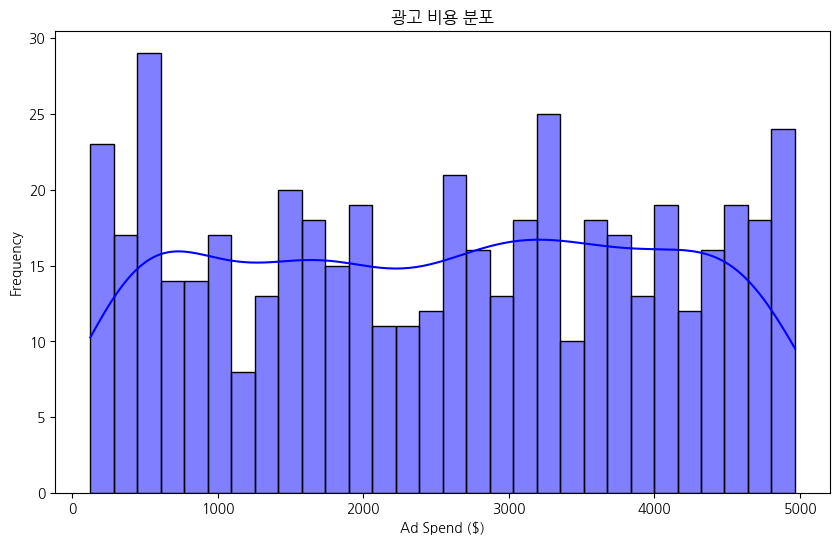

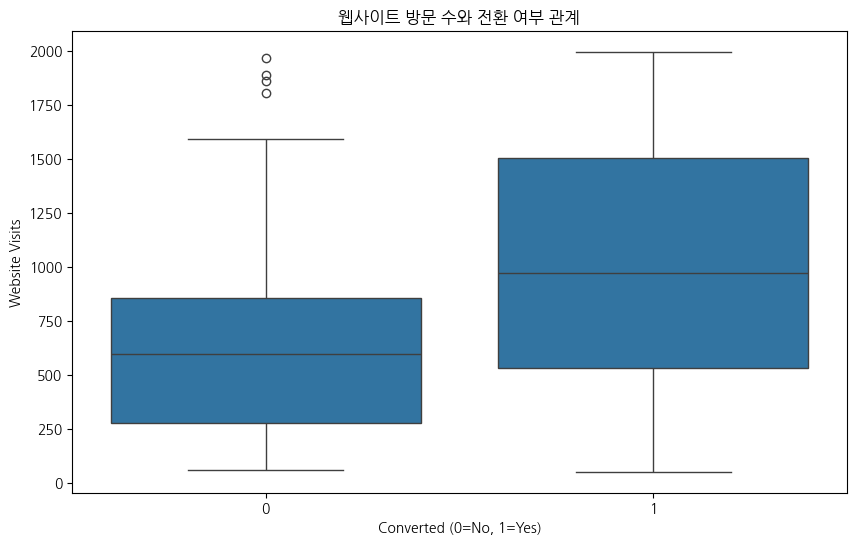

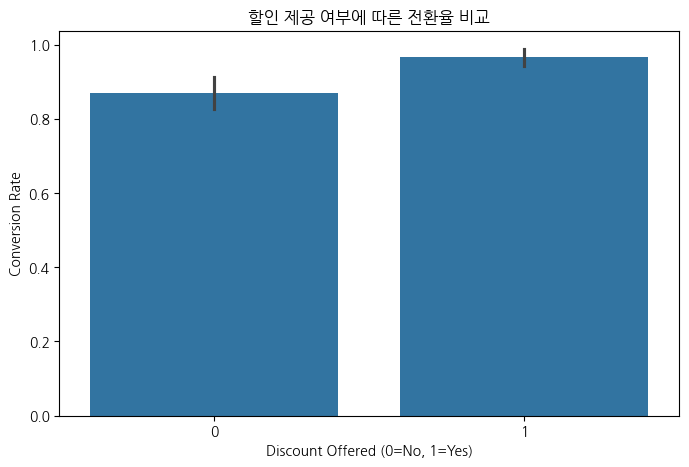

모델 정확도: 0.93
분류 보고서:
               precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.94      0.99      0.96        90

    accuracy                           0.93       100
   macro avg       0.87      0.69      0.75       100
weighted avg       0.92      0.93      0.92       100



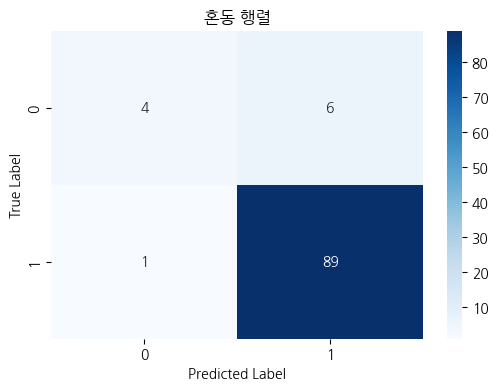

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 데이터 로드
df = pd.read_csv("conversion_rate_analysis.csv")

# 데이터 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(df["Ad Spend ($)"], bins=30, kde=True, color='blue')
plt.title("광고 비용 분포")
plt.xlabel("Ad Spend ($)")
plt.ylabel("Frequency")
plt.show()

# 웹사이트 방문 수와 전환 여부 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x="Converted", y="Website Visits", data=df)
plt.title("웹사이트 방문 수와 전환 여부 관계")
plt.xlabel("Converted (0=No, 1=Yes)")
plt.ylabel("Website Visits")
plt.show()

# 할인 제공 여부와 전환율 비교
plt.figure(figsize=(8, 5))
sns.barplot(x="Discount Offered", y="Converted", data=df)
plt.title("할인 제공 여부에 따른 전환율 비교")
plt.xlabel("Discount Offered (0=No, 1=Yes)")
plt.ylabel("Conversion Rate")
plt.show()

# 데이터셋 분리
X = df.drop(columns=["Converted"])
y = df["Converted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"모델 정확도: {accuracy:.2f}")
print("분류 보고서:\n", classification_report(y_test, y_pred))

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("혼동 행렬")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
